<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/Twitter_US_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import fastai
fastai.__version__

'1.0.60'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
bs=42

In [31]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/'
base_dir = root_dir# + 'weights/Airlines_NLP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = Path(base_dir)

In [33]:
# check if the dirctory exists if not make it
import os
if not (os.path.exists(base_dir)):
  base_dir.mkdir(parents=True, exist_ok=True)
base_dir

PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment')

In [34]:
path = Path('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/')
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/Tweets.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/Twitter US Airline Sentiment.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/fit_head.pkl')]

In [35]:
df = pd.read_csv(path/'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
data_clas = (TextList
           .from_csv(path, 'Tweets.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='airline_sentiment')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

In [37]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,neutral
xxbos @united i xxup just xxup asked xxup my xxup boyfriend xxup to xxup xxunk xxup over xxup the xxup xxunk xxup on xxup flight xxunk xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,positive
xxbos @americanair xxmaj hi . i have xxup koa - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup koa - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral
xxbos @americanair xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup xxunk up here this xxup am .. so i understand .. xxmaj btw xxup xxunk is my xxmaj airline when i m able to xxunk .. xxmaj love you guys . : ),positive
xxbos @americanair xxmaj took a flight yesterday xxunk xxup tpa - xxup dfw - xxup aus . xxmaj bag went to xxup iah . xxmaj today bag went to xxup iah - xxup dfw and then back to xxup iah . xxmaj still no bag !,negative


In [38]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [39]:
[(v, i) for i, v in enumerate(data_clas.vocab.stoi)][:100]

[('xxunk', 0),
 ('xxpad', 1),
 ('xxbos', 2),
 ('xxeos', 3),
 ('xxfld', 4),
 ('xxmaj', 5),
 ('xxup', 6),
 ('xxrep', 7),
 ('xxwrep', 8),
 ('.', 9),
 ('to', 10),
 ('i', 11),
 ('the', 12),
 ('!', 13),
 ('?', 14),
 ('a', 15),
 ('you', 16),
 ('/', 17),
 (',', 18),
 ('for', 19),
 ('flight', 20),
 ('@united', 21),
 ('on', 22),
 ('and', 23),
 ('#', 24),
 ('my', 25),
 ('@usairways', 26),
 ('@americanair', 27),
 ('is', 28),
 ('in', 29),
 ('@southwestair', 30),
 ('it', 31),
 ('@jetblue', 32),
 ('of', 33),
 ("n't", 34),
 ('me', 35),
 (':', 36),
 ('have', 37),
 ('that', 38),
 ('was', 39),
 ('your', 40),
 ('not', 41),
 ('-', 42),
 ('with', 43),
 ("'s", 44),
 ('no', 45),
 ('at', 46),
 ('do', 47),
 ('this', 48),
 ('get', 49),
 ('we', 50),
 ('&', 51),
 ('but', 52),
 ('from', 53),
 ('be', 54),
 ('t.co', 55),
 ('can', 56),
 ('are', 57),
 ('http', 58),
 ('thanks', 59),
 ('cancelled', 60),
 ('now', 61),
 ('an', 62),
 ('just', 63),
 ('service', 64),
 ('so', 65),
 ('"', 66),
 ('been', 67),
 ('help', 68),
 ('.

In [40]:
data_clas.train_ds[100]

(Text xxbos @virginamerica should i be concerned that i am about to fly on a plane that needs to be delayed due to a " tech stop " ?,
 Category negative)

In [41]:
data_clas.train_ds[100][0].data[:100]

array([   2,  105,  135,   11,   54, 1487,   38,   11,  115,  106,   10,  130,   22,   15,   88,   38,  507,   10,
         54,   99,  196,   10,   15,   66, 1755,  386,   66,   14])

In [42]:
%time
data_lm = (TextList
           .from_csv(path, 'Tweets.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


In [43]:
data_lm.show_batch()

idx,text
0,"really the only bad thing about flying xxup va xxbos @virginamerica yes , nearly every time i fly xxup vx this “ xxunk xxunk ” wo n’t go away :) xxbos @virginamerica xxmaj really missed a prime opportunity for xxmaj men xxmaj without xxmaj hats xxunk , there . https : / / t.co / xxunk xxbos @virginamerica it was amazing , and arrived an hour early . xxmaj you"
1,"flight flight yesterday . xxmaj great service xxrep 4 ! xxmaj that 's a xxmaj wow moment ! xxmaj unexpected xxunk ! xxbos @virginamerica i need a receipt for a flight change . xxmaj can you send one ? xxbos @virginamerica , i submitted a status match request a while back and still have n’t heard ! i ’m flying on xxmaj monday . xxmaj can you look / xxunk"
2,"back ! xxmaj what have you done with it ? ! xxmaj he also wants the money .. xxbos @united xxunk worse customer service ever . xxmaj problems will happen , how you deal xxunk a company . xxmaj never again xxmaj united . xxbos @united xxmaj it 's still a valid flight . xxmaj just seems strange to delay for xxmaj late xxmaj flight inbound crew , 7 hours"
3,. xxmaj what a day ! # xxunk # xxunk http : / / t.co / xxunk t xxbos @united thank xxup you for your kindness . xxmaj your agents went above & & beyond to get my stranded family home . xxbos @united do n't see a xxunk cost to get on an early flight with seats . xxmaj no airline charges to xxunk get their passengers in early
4,"no xxup gate ! # xxunk always the same thing w / u xxbos @united i just checked my united app and the most valuable use of this app has been xxunk . i can no longer see the status of my equipment ? xxbos @united even after running to gate from your connecting flight , your customer service not let us in the plane that was just parked ."


In [0]:
# drop_mult speifies the amount of dropout to apply
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


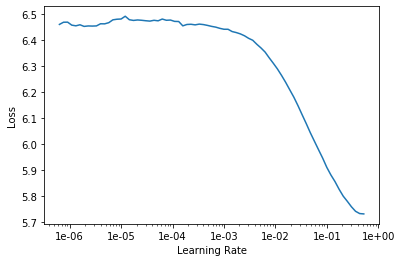

In [45]:
learn.lr_find()
# skip the last 15 learning rates in the plot so we can get a better visualization
learn.recorder.plot(skip_end=15)

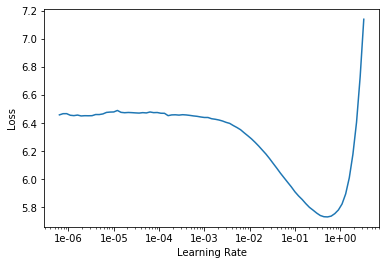

In [46]:
learn.recorder.plot()


In [47]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.318913,3.921637,0.267033,00:17


In [48]:
%%time
learn.export(base_dir/'fit_head1.pkl')

CPU times: user 79.3 ms, sys: 37.6 ms, total: 117 ms
Wall time: 216 ms


In [50]:
learn = load_learner(base_dir, 'fit_head1.pkl')

In [0]:
learn.unfreeze()

In [52]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

ZeroDivisionError: ignored

In [0]:
from fastai.callbacks import *
import os
os.chdir(base_dir)

In [0]:
callbacks = [SaveModelCallback(learn, every='epoch', monitor='valid_loss', mode='auto', name='fine_tuned')]

In [55]:
learn.fit_one_cycle(2, 1e-02, moms=(0.8, 0.7), callbacks=callbacks)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 127))



AssertionError: ignored